The objective of this experiment is to understand word2vec.

In this experiment we will use **Mahabharata** as our text corpus

##### Importing the required packages

In [1]:
import gensim
# Operating System
import os
# Regular Expression
import re
# nltk packages
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
# Basic Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# PCA Package
from sklearn.decomposition import PCA

Snowball is a small string processing language designed for creating stemming algorithms for use in Information Retrieval. 

##### Creating a new instance of a language specific subclass.

In [2]:
stemmer = SnowballStemmer("english")

##### In below cell we are trying to pre-process the text data and not stemming 

*   List item

*   List item
*   List item


*   List item

the stop words

In [8]:
stopWords = pd.read_csv(r'/content/sample_data/stopwords.txt').values
class MySentences(object):
    def __init__(self, fnamelist):
        self.fnamelist = fnamelist
        # Creating a set of vocabulary
        self.vocabulary = set([])

    def __iter__(self):
        for fname in self.fnamelist:
            for line in open(fname, encoding='latin1'):
                # Find all the words that has letters from 2 - 15. If the words are longer than that ignore.
                words = re.findall(r'(\b[A-Za-z][a-z]{2,15}\b)', line)
                # Stemming a word.
                words = [ stemmer.stem(word.lower()) for word in words if not word.lower() in stopWords]
                for word in words:
                    self.vocabulary.add(word)
                yield words

##### In below cell we will read the data using an iterator in the class MySentences(). 

Gensim model: https://radimrehurek.com/gensim/models/word2vec.html

In [10]:
sentences = MySentences(['/content/sample_data/MB.txt']) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences, min_count=100)
# model_load = gensim.models.Word2Vec.load('MB2Vec.bin')

In [11]:
model_load = model

##### Lets see the most similar words related to different characters

In [12]:
model_load.wv.most_similar('krishna')[:3]

[('kesava', 0.8543685674667358),
 ('vasudeva', 0.8145432472229004),
 ('govinda', 0.7846795320510864)]

In [13]:
model_load.wv.most_similar('arjuna')[:3]

[('partha', 0.8979674577713013),
 ('dhananjaya', 0.8264049887657166),
 ('kama', 0.8095197677612305)]

In [14]:
model_load.wv.most_similar('virata')[:3]

[('drupada', 0.872225284576416),
 ('chedi', 0.8389759063720703),
 ('kasi', 0.8292455673217773)]

##### We will save the trained vectors .

In [15]:
model = model.save("MB2Vec_cbow.bin")

##### Iterating through the vocabulary and constructing the word and vector list

In [16]:
words_list = np.array([])
vector_list = np.array([])
for i in model_load.wv.vocab:
    # print(i)
    try :
        words_list = np.append(words_list, i)
        vector_list = np.append(vector_list, model_load.wv[i])
    except :
        pass
vector_list = vector_list.reshape(len(model_load.wv.vocab), -1)

In [17]:
model_load

In [18]:
vector_list

array([[ 0.24397752,  1.44978917,  0.25775975, ..., -0.7156359 ,
        -0.54473507, -0.26401079],
       [-0.22691029,  1.08452082, -0.48434371, ..., -0.1385314 ,
         0.49288729,  0.25618011],
       [ 0.19703586,  1.75663221,  0.10258948, ..., -0.57738131,
        -0.33063829, -0.5389874 ],
       ...,
       [ 0.10179108, -0.54114199,  0.00523737, ...,  0.07535721,
        -0.37491289,  0.10212232],
       [ 0.56074184, -0.71436507,  0.31360039, ...,  0.04637676,
        -0.42078859, -0.14803347],
       [-0.05416181,  0.12971555,  0.2168202 , ...,  0.00669603,
        -0.20669788,  0.34628016]])

##### Applying PCA on the vector_list to reduce the dimensions

In [19]:
pca = PCA(n_components=2)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

##### Checking the shape of the vector_list

In [20]:
vector_list.shape

(1701, 100)

##### Checking the shape of the compressed_list after applying PCA

In [21]:
compressed_list.shape

(1701, 2)

##### Let us find the location of some characters in word_list to get the locations

In [22]:
# characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
characters = ['dussasana','sakuni','duryodhana','bhishma','krishna','madri','pandu', 'kunti', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)

[1627, 1626, 1522, 19, 1245, 1500, 1232, 245, 1572, 1381, 1646, 1531, 1603]


In [23]:
words_list

array(['translat', 'origin', 'text', ..., 'dhartarashtra', 'horsemen',
       'carnag'], dtype='<U32')

##### Let us Plot the data

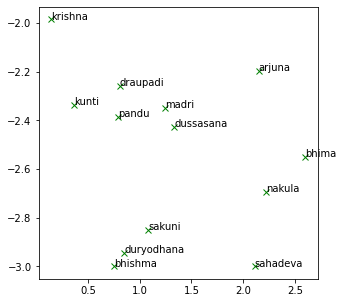

In [24]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model_load.wv.get_vector(character)
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "gx")
    ax.annotate(words_list[pos], xy=value, xytext=value)
plt.show()
fig.savefig('word2vec.png')

###### Characters are grouped together based on word2vec learnt by the model.

##### We will see the most similar characters related to characters list as shown below.

##### characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']

In [25]:
# Persons closer to the characters of our choice based on the word2vec model
for character in characters:
    near = model_load.wv.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:vikarna:chitrasena:somadatta
sakuni	dussasana:duhsasana:vikarna:suvala:valhika
duryodhana	dussasana:suyodhana:sakuni:jayadratha:dhritarashtra
bhishma	salya:sanjaya:vaisampayana:savyasachin:kama
krishna	kesava:vasudeva:govinda:madhava:vibhatsu
madri	somadatta:prishata:subhadra:suvala:valiant
pandu	pritha:kunti:radha:suta:subhadra
kunti	pritha:radha:pandu:suta:subhadra
bhima	bhimasena:vrikodara:abhimanyu:satyaki:dhananjaya
arjuna	partha:dhananjaya:kama:vibhatsu:vrikodara
nakula	sahadeva:vikarna:aswatthaman:duhsasana:chitrasena
sahadeva	nakula:satyaki:vikarna:duhsasana:dhrishtadyumna
draupadi	drupada:madri:dussasana:suvala:sakuni


In [26]:
#TASK Modify the gensim word2vec model to train skip gram model.

In [27]:
model_sg = gensim.models.Word2Vec(sentences, min_count=100,sg=1)

In [28]:
model_sg.save('MB2Vec_SG.bin')

In [29]:
model_sg.wv.most_similar('krishna')[:3]

[('kesava', 0.7777543067932129),
 ('vasudeva', 0.7349647283554077),
 ('govinda', 0.7264777421951294)]

In [30]:
model_sg.wv.most_similar('arjuna')[:3]

[('partha', 0.7743347883224487),
 ('phalguna', 0.7468970417976379),
 ('janardana', 0.7406601905822754)]

In [31]:
model_sg.wv.most_similar('virata')[:3]

[('drupada', 0.8753161430358887),
 ('kasi', 0.8065705299377441),
 ('magadha', 0.7997111082077026)]

In [32]:
words_list = np.array([])
vector_list = np.array([])
for i in model_sg.wv.vocab:
    # print(i)
    try :
        words_list = np.append(words_list, i)
        vector_list = np.append(vector_list, model_sg.wv[i])
    except :
        pass
vector_list = vector_list.reshape(len(model_sg.wv.vocab), -1)

In [33]:
vector_list

array([[ 0.14366461,  0.59927624,  0.23938744, ..., -0.33505073,
        -0.37230885, -0.33318937],
       [ 0.00476464,  0.80147493, -0.09694942, ..., -0.07652889,
         0.33686984,  0.25590381],
       [ 0.09492081,  0.84931254,  0.40883961, ..., -0.19575162,
        -0.35612169, -0.38410014],
       ...,
       [-0.10396479, -0.03932578, -0.09107188, ...,  0.05703537,
        -0.25653532,  0.06830938],
       [ 0.40246108, -0.32947695,  0.16629687, ...,  0.18469097,
        -0.35831216,  0.07118917],
       [-0.02156432,  0.35138363,  0.0264676 , ..., -0.01727219,
        -0.11807235,  0.32021958]])

In [34]:
vector_list.shape

(1701, 100)

In [35]:
pca = PCA(n_components=2)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

In [36]:
characters = ['dussasana','sakuni','duryodhana','bhishma','krishna','madri','pandu', 'kunti', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi',]
locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)

[1627, 1626, 1522, 19, 1245, 1500, 1232, 245, 1572, 1381, 1646, 1531, 1603]


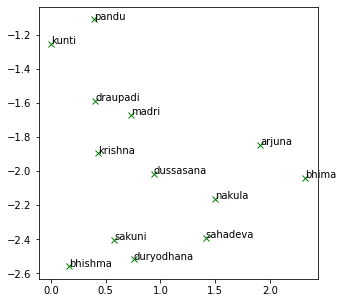

In [37]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model_load.wv.get_vector(character)
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "gx")
    ax.annotate(words_list[pos], xy=value, xytext=value)
plt.show()
fig.savefig('skipgram.png')

In [38]:
# Persons closer to the characters of our choice based on the word2vec model
for character in characters:
    near = model_sg.wv.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:suvala:vikarna:suyodhana
sakuni	suvala:dussasana:duhsasana:vikarna:valhika
duryodhana	suyodhana:dussasana:sakuni:duhsasana:jayadratha
bhishma	somadatta:salya:kripa:aswatthaman:bhurisrava
krishna	kesava:vasudeva:govinda:vibhatsu:madhava
madri	nakula:prishata:sahadeva:valiant:subhadra
pandu	kunti:pritha:madri:subhadra:radha
kunti	pritha:pandu:radha:madri:dhananjaya
bhima	bhimasena:vrikodara:janardana:satyaki:ghatotkacha
arjuna	partha:phalguna:janardana:dhananjaya:vibhatsu
nakula	sahadeva:madri:chitrasena:yuyudhana:duhsasana
sahadeva	nakula:madri:duhsasana:chitrasena:bhimasena
draupadi	subhadra:drupada:virata:princess:madri


In [39]:
for character in characters:
    near = model_load.wv.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")


dussasana	sakuni:duhsasana:vikarna:chitrasena:somadatta
sakuni	dussasana:duhsasana:vikarna:suvala:valhika
duryodhana	dussasana:suyodhana:sakuni:jayadratha:dhritarashtra
bhishma	salya:sanjaya:vaisampayana:savyasachin:kama
krishna	kesava:vasudeva:govinda:madhava:vibhatsu
madri	somadatta:prishata:subhadra:suvala:valiant
pandu	pritha:kunti:radha:suta:subhadra
kunti	pritha:radha:pandu:suta:subhadra
bhima	bhimasena:vrikodara:abhimanyu:satyaki:dhananjaya
arjuna	partha:dhananjaya:kama:vibhatsu:vrikodara
nakula	sahadeva:vikarna:aswatthaman:duhsasana:chitrasena
sahadeva	nakula:satyaki:vikarna:duhsasana:dhrishtadyumna
draupadi	drupada:madri:dussasana:suvala:sakuni


In [ ]:
near[0]

('drupada', 0.8605422377586365)

In [40]:
#skip-gram is better in this case